<a href="https://colab.research.google.com/github/PkwPanu/Model/blob/main/ReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Define the state space
states = ['low_season', 'high_season', 'sunny_day', 'rainy_day', 'popular_attraction', 'less_popular_attraction']
num_states = len(states)

# Define the action space
actions = ['increase_price', 'decrease_price', 'maintain_price']
num_actions = len(actions)

# Define the reward function
def get_reward(state, action):
    # This is just an example function - the actual reward function would depend on the specific problem at hand
    if state == 'high_season' and action == 'decrease_price':
        return -1
    elif state == 'low_season' and action == 'increase_price':
        return -1
    elif state == 'rainy_day':
        return 0.5
    else:
        return 1

# Define the Q-table
q_table = np.zeros((num_states, num_actions))

# Define the hyperparameters
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.1 # exploration rate

# Define the epsilon-greedy policy
def epsilon_greedy_policy(state):
    if np.random.uniform(0, 1) < epsilon:
        # Explore
        action = np.random.choice(range(num_actions))
    else:
        # Exploit
        q_values = q_table[state, :]
        max_q_value = np.max(q_values)
        actions_with_max_q_value = np.where(q_values == max_q_value)[0]
        action = np.random.choice(actions_with_max_q_value)
    return action

# Train the Q-learning agent
num_episodes = 1000
for episode in range(num_episodes):
    state = np.random.randint(0, num_states)
    done = False
    while not done:
        action = epsilon_greedy_policy(state)
        print(state,action)
        reward = get_reward(states[state], actions[action])
        next_state = np.random.randint(0, num_states)
        q_value = q_table[state, action]
        next_q_values = q_table[next_state, :]
        max_next_q_value = np.max(next_q_values)
        td_target = reward + gamma * max_next_q_value
        td_error = td_target - q_value
        q_table[state, action] += alpha * td_error
        state = next_state
        if state == num_states - 1:
            done = True

# Use the learned Q-table to make pricing decisions
state = np.random.randint(0, num_states)
action = np.argmax(q_table[state, :])
print("State: ", states[state])
print("Action: ", actions[action])

In [ ]:
# Use the learned Q-table to make pricing decisions
state = np.random.randint(0, num_states)
action = np.argmax(q_table[state, :])
print("State: ", states[state])
print("Action: ", actions[action])

State:  sunny_day
Action:  decrease_price


**RL for path finding**

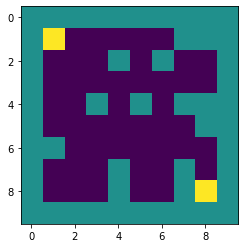

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# define the grid world game environment
num_rows = 10
num_cols = 10
start_state = (1, 1)
goal_state  = (8, 8)
obsctruct_num=20
invalid_states=[(i,j) for i,j in zip(np.random.randint(0,num_cols,obsctruct_num),np.random.randint(0,num_rows,obsctruct_num))]
invalid_states = invalid_states+[(0, j) for j in range(num_rows) ] + [(num_cols-1, j) for j in range(num_rows)]+[( j, 0) for j in range(num_cols)]+[( j, num_rows-1) for j in range(num_cols)]

map=np.zeros([num_rows,num_cols])
map[start_state]= 1
map[goal_state] = 1
for x in invalid_states:
  map[x] = 0.5
plt.imshow(map)

In [177]:
# define the reward function
def get_reward(state, action):
    """
    Returns the reward for taking an action in a given state.
    """
    if is_goal_state(state, action):
        return 1000
    elif is_invalid_state(state, action):
        return -100
    else:
        return -1

# define helper functions for the reward function
def is_goal_state(state, action):
    new_state = take_action(state, action)
    return new_state == goal_state

def is_invalid_state(state, action):
    new_state = take_action(state, action)
    return new_state in invalid_states

def take_action(state, action):
    row, col = state
    if action == "up":
        row = max(row - 1, 0)
    elif action == "down":
        row = min(row + 1, num_rows - 1)
    elif action == "left":
        col = max(col - 1, 0)
    elif action == "right":
        col = min(col + 1, num_cols - 1)
    return (row, col)

# define the Q-learning algorithm
def q_learning(num_episodes, alpha, gamma, epsilon):
    # initialize Q values to 0
    q_values = np.zeros((num_rows, num_cols, 4))
    episode_suc=0
    for episode in range(num_episodes):
        # initialize state and episode length
        state = start_state
        done = False
        t = 0       
        # choose action using exploitation 
        if np.random.uniform() < epsilon:
            action = np.random.choice(action_choice)
        else:       
            action = action_choice[np.argmax(q_values[state[0], state[1], :])]     
        while not done:
            # take action and get reward
            next_state = take_action(state, action)
            reward = get_reward(state, action)
            
            # choose next action using epsilon-greedy policy
            if np.random.uniform() < epsilon:
                next_action = np.random.choice(action_choice)
            else:
                next_action = action_choice[np.argmax(q_values[next_state[0], next_state[1], :])]
            # update Q value'
            action_id=action_choice.index(action)   
            q_values[state[0], state[1], action_id] += alpha * (reward + gamma * q_values[next_state[0], next_state[1], action_choice.index(next_action)] - q_values[state[0], state[1], action_id])    
            # update state and action
            state = next_state
            action = next_action
            if (state == goal_state):
              episode_suc+=1
            # check if goal state is reached or maximum episode length is exceeded
            done = (state == goal_state) or (t >= 500)
            t += 1

    print(episode_suc)
    return q_values
    

action_choice= ["up", "down", "left", "right"]

# run the Q-learning algorithm for 1000 episodes
q_values = q_learning(num_episodes=1000, alpha=0.5, gamma=0.1, epsilon=0.1)


770


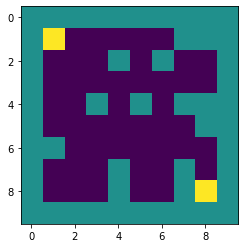

In [178]:
map=np.zeros([num_rows,num_cols])
map[start_state]= 1
map[goal_state] = 1
for x in invalid_states:
  map[x] = 0.5
plt.imshow(map)

In [179]:
state=start_state
done = False
i=1
while not done:
  i+=0.1
  action=action_choice[np.argmax(q_values[state[0],state[1], :])]
  state=take_action(state,action)
  map[state]=i
  done = (state==goal_state) 

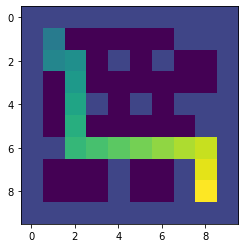

In [180]:
plt.imshow(map)